In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/courses/cse519/data/


/content/drive/MyDrive/courses/cse519/data


In [ ]:
import pandas as pd

# Load the DataFrame
df_filtered = pd.read_csv('df_filtered_latest.csv')

# Now you can work with the DataFrame
print(df_filtered.head())
df_filtered.info()

                                            selftext  \
0  My corona is covered with foreskin so it is no...   
1                         It's called Google Sheets.   
2  The vacuum doesn't snore after sex.\n\n&amp;#x...   
3                                        Oo..lala...   
4  Yo momma's so fat, that when she went to the z...   

                                               title  score   created_utc  \
0               I am soooo glad I'm not circumcised!    2.0  1.585786e+09   
1  Did you know Google now has a platform for rec...    9.0  1.585786e+09   
2  What is the difference between my wife and my ...   15.0  1.585786e+09   
3  What did the French man say to the attractive ...    2.0  1.585784e+09   
4                                            Yo Mama    0.0  1.585784e+09   

                                           joke_text language  \
0  I am soooo glad I'm not circumcised! My corona...       en   
1  Did you know Google now has a platform for rec...       en   
2  Wh

In [ ]:
# prompt: only keep processed_text , created_utc , score and save

# Keep only the specified columns
df_filtered = df_filtered[['processed_text', 'created_utc', 'score']]

# Save the modified DataFrame
df_filtered.to_csv('df_filtered_latest_modified.csv', index=False)

In [ ]:
df_sampled = df_filtered.sample(n=100000, random_state=42).reset_index(drop=True)

In [ ]:
import pandas as pd
import re
from tqdm import tqdm

# Load the dataset
file_path = 'df_filtered_latest_modified.csv'
df = pd.read_csv(file_path)

# Comprehensive offensive word list
offensive_words = [
    "ass", "bitch", "damn", "shit", "fuck", "bastard", "hell", "bloody", "bugger", "crap", "piss",
    "dick", "cock", "pussy", "twat", "fag", "dyke", "wanker", "bollocks", "arsehole", "motherfucker",
    "cunt", "goddamn", "douchebag", "jackass", "scumbag", "dumbass", "sex", "horny", "blowjob",
    "clitoris", "dildo", "ejaculate", "orgasm", "porn", "vagina", "penis", "testicle", "anal", "oral",
    "erect", "climax", "masturbate", "intercourse", "coitus", "fellatio", "cunnilingus", "sodomy",
    "fornication", "prostitute", "whore", "slut", "pimp", "brothel", "boobs", "tits", "smash", "thirsty",
    "clapping cheeks", "motorboating", "sixty-nine", "strap-on", "squirting", "bang", "booty call",
    "get lucky", "snack", "slide into DMs", "quickie", "hook up", "friends with benefits", "FWB",
    "Netflix and chill", "thirst trap", "sneaky link", "MILF", "daddy", "sugar daddy", "cougar", "anus",
    "butt", "cum", "semen", "urine", "feces", "vomit", "snot", "phlegm", "labia", "scrotum", "balls",
    "nuts", "jizz", "spunk", "gambling", "stripper", "lap dance", "orgy", "gangbang", "bukkake",
    "bondage", "fetish", "kink", "sadomasochism", "dominatrix", "submissive", "BDSM", "DD/lg",
    "age play", "nylon fetish", "teabagging", "snowballing", "cocaine", "heroin", "meth", "weed",
    "crack", "pot", "junkie", "addict", "alcoholic", "drunk", "high", "stoned", "wasted", "overdose",
    "needle", "bong", "joint", "chink", "coon", "nigger", "retard", "faggot", "queer", "spic",
    "wetback", "kike", "gook", "towelhead", "raghead", "tranny", "homo", "kill", "murder", "stab",
    "shoot", "gun", "bomb", "terrorist", "slaughter", "massacre", "assassinate", "strangle",
    "torture", "mutilate", "decapitate", "dismember", "maim", "abortion", "rape", "incest",
    "pedophile", "nazi", "holocaust", "slavery", "lynching", "suicide", "euthanasia", "terrorism",
    "pansexual", "omnisexual"
]

# Function to label offensive content
def label_joke_with_list(text, offensive_words):
    if not isinstance(text, str):
        return "Clean"
    if any(re.search(rf'\b{word}\b', text, re.IGNORECASE) for word in offensive_words):
        return "Offensive"
    return "Clean"

# Add a progress bar to the labeling process
tqdm.pandas()

# Apply the labeling function with progress tracking
df['label'] = df['processed_text'].progress_apply(lambda x: label_joke_with_list(x, offensive_words))

# Separate offensive and clean subsets
offensive_subset_full = df[df['label'] == "Offensive"]
clean_subset_full = df[df['label'] == "Clean"]

# Balance the dataset by sampling equal numbers from both subsets
sample_size_full = min(len(offensive_subset_full), len(clean_subset_full))
balanced_offensive_sample_full = offensive_subset_full.sample(n=sample_size_full, random_state=42)
balanced_clean_sample_full = clean_subset_full.sample(n=sample_size_full, random_state=42)

# Combine the balanced dataset and shuffle
df_sampled = pd.concat([balanced_offensive_sample_full, balanced_clean_sample_full]).sample(frac=1, random_state=42)

# Display the label distribution in the final balanced dataset
print(df_sampled['label'].value_counts())



100%|██████████| 558509/558509 [06:11<00:00, 1505.22it/s]


label
Clean        110023
Offensive    110023
Name: count, dtype: int64


In [ ]:
# Verify some examples from the dataset labeled as "Offensive"
offensive_examples = df_sampled[df_sampled['label'] == "Offensive"].head(10)

# Verify some examples from the dataset labeled as "Clean"
clean_examples = df_sampled[df_sampled['label'] == "Clean"].head(10)

# Display the results for user review
offensive_examples[['processed_text', 'label']], clean_examples[['processed_text', 'label']]

df_sampled.info()


<class 'pandas.core.frame.DataFrame'>
Index: 220046 entries, 83427 to 166110
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   processed_text  220043 non-null  object 
 1   created_utc     220046 non-null  float64
 2   score           220046 non-null  float64
 3   label           220046 non-null  object 
dtypes: float64(2), object(2)
memory usage: 8.4+ MB


In [ ]:
# prompt: reindex'

# Reindexing the DataFrame
df_sampled = df_sampled.reset_index(drop=True)

# Displaying the first few rows of the reindexed DataFrame
print(df_sampled.head())

                                      processed_text   created_utc  score  \
0            american dumb smart one get shot school  1.563992e+09    0.0   
1  glen van brummelen hipparchus menelaus pythago...  1.525584e+09    1.0   
2  also accidentally bought fleshlight instead fl...  1.487544e+09    1.0   
3  engineer using tracking try distinguish autono...  1.516076e+09    1.0   
4  grandfather favorite joke bad language farmer ...  1.433183e+09   57.0   

       label  
0      Clean  
1      Clean  
2  Offensive  
3      Clean  
4  Offensive  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the dataset into training and testing sets
X = df_sampled['processed_text']
y = df_sampled['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle missing values in 'processed_text'
# Replace np.nan with empty strings
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:46:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     22005
           1       1.00      0.97      0.99     22005

    accuracy                           0.99     44010
   macro avg       0.99      0.99      0.99     44010
weighted avg       0.99      0.99      0.99     44010



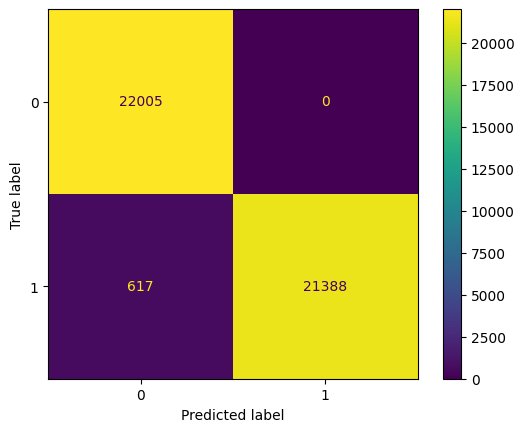

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your training labels
label_encoder.fit(y_train)

# Transform your training and testing labels to numerical values
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now use y_train_encoded and y_test_encoded for training and evaluation
xgb_model.fit(X_train_tfidf, y_train_encoded)

# Predict and evaluate (using y_test_encoded for comparison)
y_pred_xgb = xgb_model.predict(X_test_tfidf)
print("XGBoost Classification Report:\n", classification_report(y_test_encoded, y_pred_xgb))
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)
ConfusionMatrixDisplay(conf_matrix_xgb, display_labels=xgb_model.classes_).plot()

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, Dataset

# Custom dataset for BERT
class JokesDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = 1 if self.labels.iloc[idx] == "Offensive" else 0
        encoding = self.tokenizer(
            text, max_length=self.max_len, truncation=True, padding="max_length", return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "label": torch.tensor(label, dtype=torch.long),
        }

# Tokenizer and model initialization
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Prepare dataset
train_dataset = JokesDataset(X_train, y_train, tokenizer)
test_dataset = JokesDataset(X_test, y_test, tokenizer)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Optimizer and device setup
optimizer = AdamW(bert_model.parameters(), lr=5e-5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

# Training loop
bert_model.train()
epochs = 3
for epoch in range(epochs):
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)
        outputs = bert_model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader)}")

# Evaluation
bert_model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)
        outputs = bert_model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())

# Metrics
print("BERT Classification Report:\n", classification_report(all_labels, all_preds))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Logistic Regression with hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Solvers
}

log_reg = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Best model after tuning
best_log_reg = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

       Clean       0.93      0.97      0.95     22005
   Offensive       0.97      0.93      0.95     22005

    accuracy                           0.95     44010
   macro avg       0.95      0.95      0.95     44010
weighted avg       0.95      0.95      0.95     44010



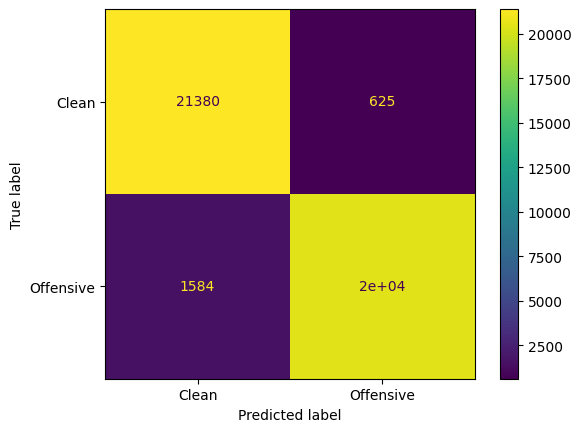

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predictions on the test set
y_pred = best_log_reg.predict(X_test_tfidf)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=best_log_reg.classes_).plot()


In [ ]:
# prompt: can I have the result in tabular format as output here?

from google.colab import drive
import pandas as pd
import re
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

drive.mount('/content/drive')

%cd /content/drive/MyDrive/courses/cse519/data/

# Load the DataFrame
df_filtered = pd.read_csv('df_filtered_latest.csv')

# ... (rest of your existing code) ...

# Display the results for user review in a tabular format
print("Offensive Examples:")
print(offensive_examples[['processed_text', 'label']].to_string(index=False))  # Use to_string for tabular output
print("\nClean Examples:")
print(clean_examples[['processed_text', 'label']].to_string(index=False))    # Use to_string for tabular output

# ... (rest of your existing code) ...

176036 44010


In [ ]:
# Install required libraries
!pip install transformers torch pandas tqdm

# Import Libraries
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define the model repository
model_name = "unitary/toxic-bert"  # Replace with your chosen model

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/174 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/811 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e